In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from src.pca import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('datasets/MI_timesteps.txt',delim_whitespace=True)
data = np.array(df,dtype=float)
# remove burn-in period of 1000 time steps 
data = data[1000:, ]

In [3]:
data.shape

(14001, 10)

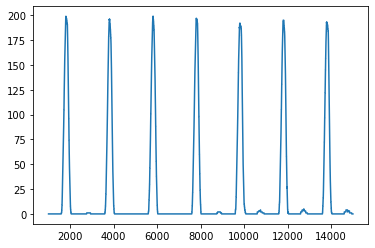

In [4]:
plt.plot(data[:, 0], data[:, 1])

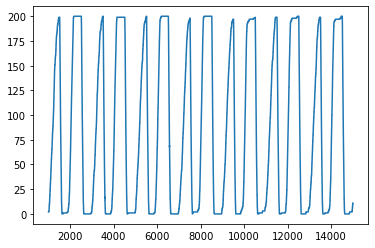

In [5]:
plt.plot(data[:, 0], data[:, 2])

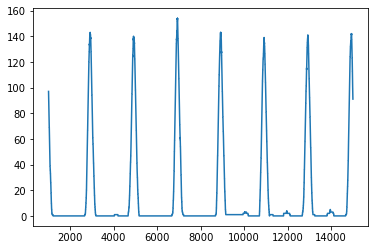

In [6]:
plt.plot(data[:, 0], data[:, 3])

## Task5.1

In [45]:
delay = 351
delay_embedd = np.empty((data.shape[0] - delay, delay*3))
for i in range(data.shape[0] - delay):
    delay_embedd[i] = data[i: i+delay, 1:4].reshape(-1)

In [53]:
u,s,vh,s_truncated = pca(delay_embedd, 3)

In [59]:
proj = (u @ s_truncated)

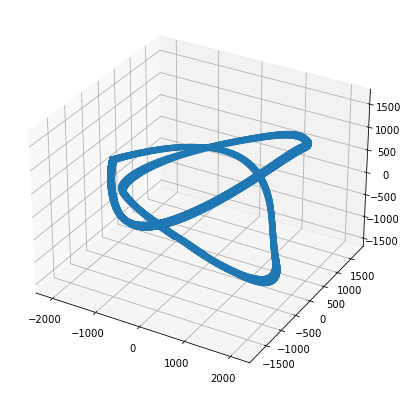

In [60]:
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
ax.scatter(proj[:,0], proj[:,1], proj[:,2])